In [1]:
# perceptron.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

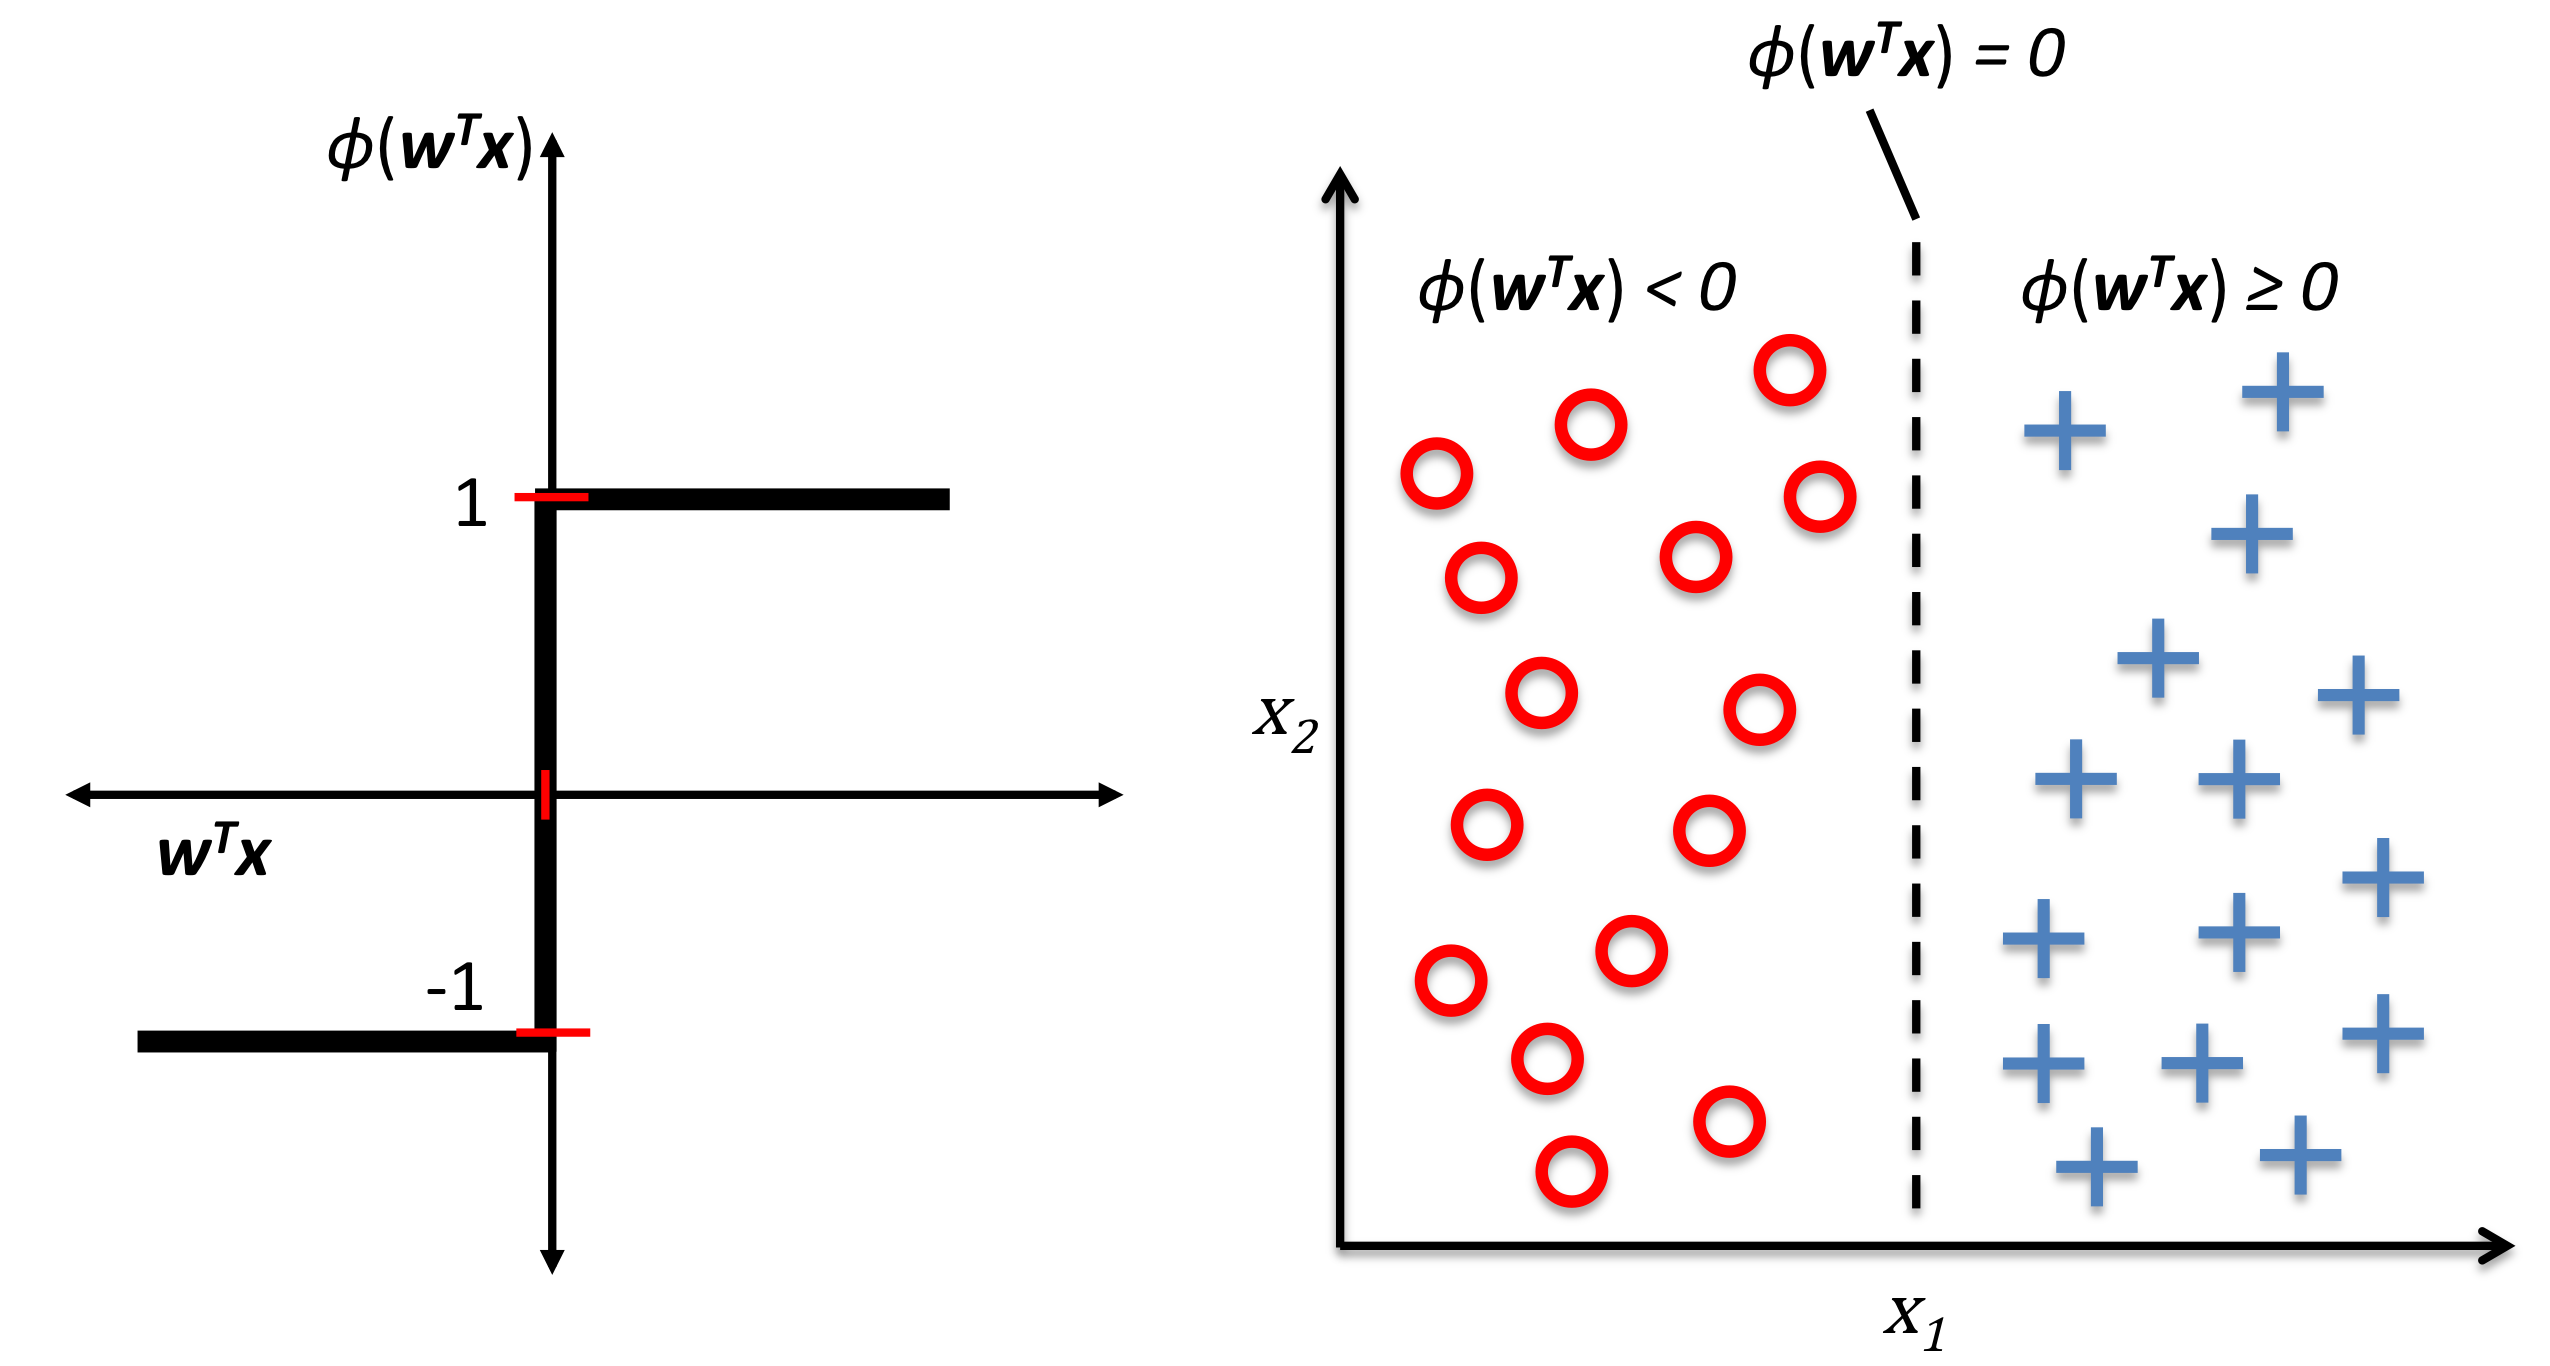

In [2]:
from IPython.display import Image
Image(filename='D://机器学习//万门机器学习//代码//wanmen_course (copy)//linearclassifiers（线性分类器）//images//02_02.png', width=500)

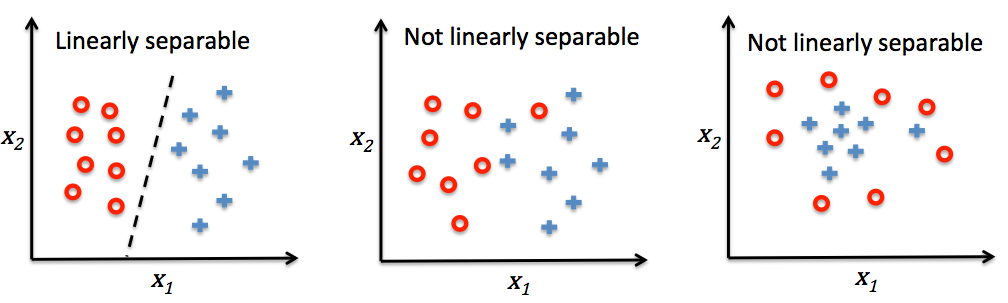

In [3]:
Image(filename='D://机器学习//万门机器学习//代码//wanmen_course (copy)//linearclassifiers（线性分类器）//images//02_03.png', width=600) 

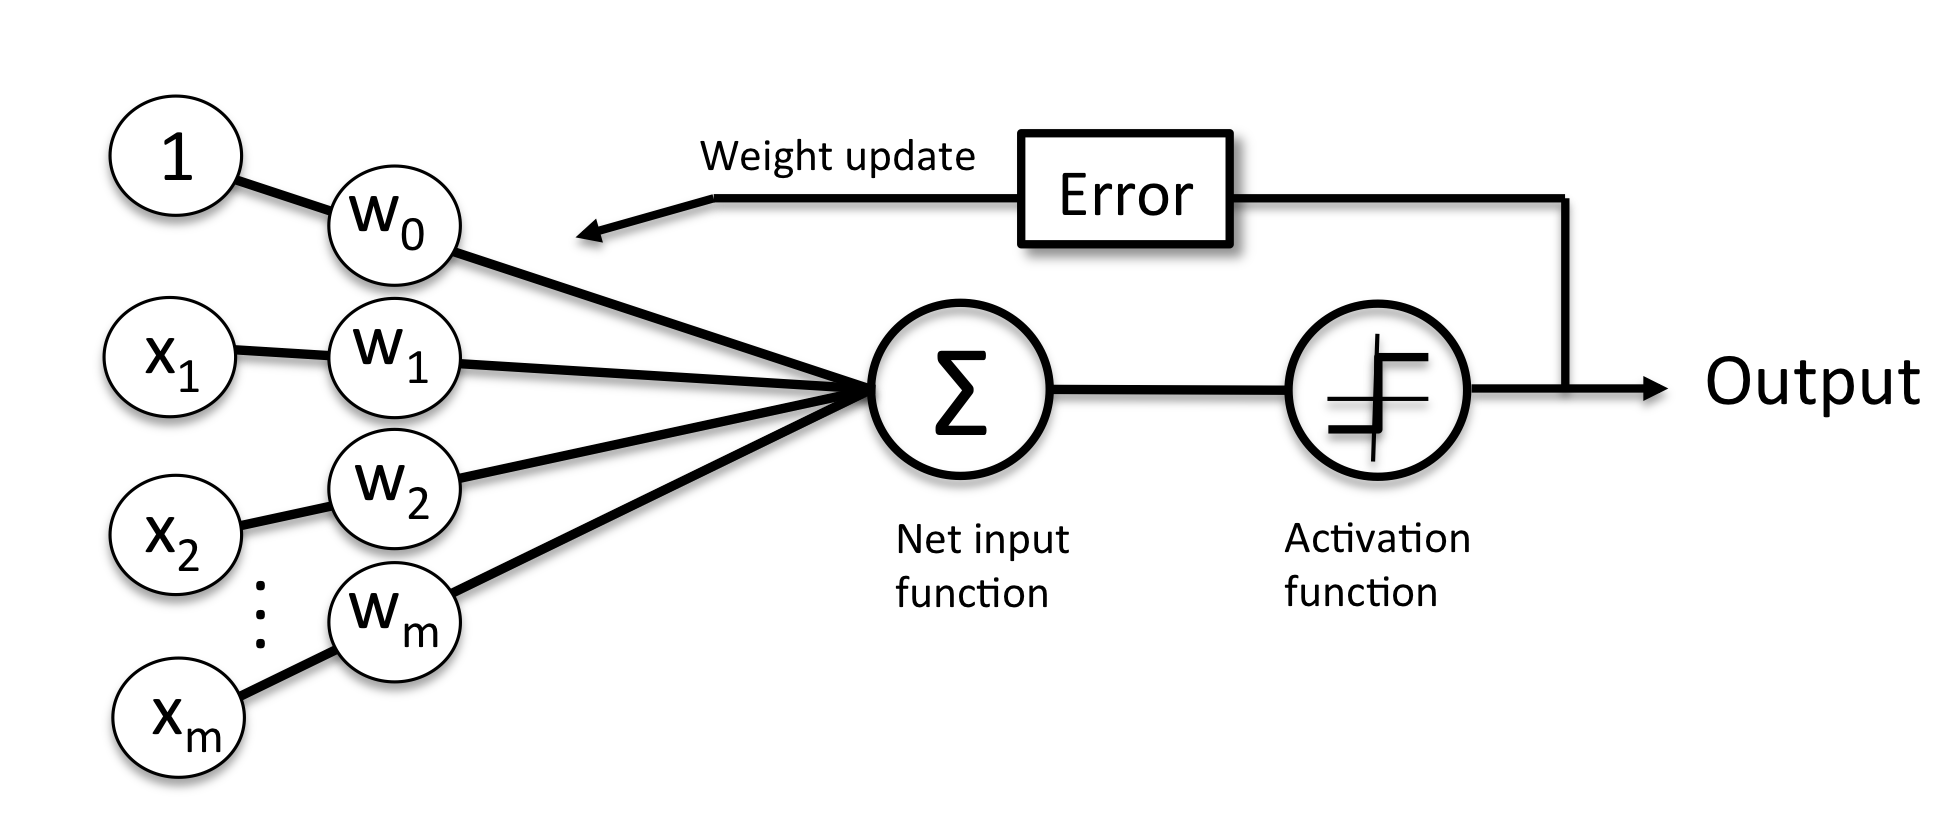

In [4]:
 Image(filename='D://机器学习//万门机器学习//代码//wanmen_course (copy)//linearclassifiers（线性分类器）//images//02_04.png', width=600) 

Here we see that we can use the stochastic gradient desent , which is very important method for later use  

In [10]:
class Perceptron(object):
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # weights,初始置0
        self.weight = np.zeros(1 + X.shape[1])
  
        # Number of misclassifications
        self.errors = []  # Number of misclassifications
  
        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w= self.rate * (target-self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [11]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [14]:
len(df)

150

In [15]:
df = df.sample(frac=1).reset_index(drop=True)

X_train = df.iloc[0:100, [0, 2]].values.astype(float)
y_train = df.iloc[0:100, 4].values
y_train = np.where(y_train == 'Iris-setosa', -1, 1)

X_test = df.iloc[100:150, [0, 2]].values.astype(float)
y_test = df.iloc[100:150, 4].values
y_test = np.where(y_test == 'Iris-setosa', -1, 1)


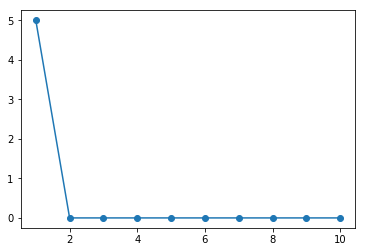

In [16]:
pn = Perceptron(0.1, 10)
pn.fit(X_train, y_train)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.show()

## We define a class, try to test  the performance  in different angles , recall - finding how much positive we have predicted correclty found from all positive,   or precison how much positivve we have predicted correclty from all we predicted positive  # accrency, how many real positive we have made. Class is used to include all cases. 

In [17]:
class Test(object):
    def __init__(self,predict,true):
        self.predict = predict
        self.true = true

    def test_values(self):
        self.TP=0
        self.FP=0
        self.TN=0
        self.FN=0
        for te,tr in zip(self.predict,self.true):
            if te==1 and tr==1:
                self.TP+=1 
            if te==1 and tr==0:
                self.FP+=1 
            if te==0 and tr==1:
                self.FN+=1
            if te==0 and tr==0:
                self.TN+=1           
      
    def recall(self):
        return self.TP/(self.TP+self.FN)
        
    def precision(self):
        return self.TP/(self.TP+self.FP)

    def accurency(self):
        return (self.TP+self.TN)/(self.TP+self.FP+self.TN+self.FN)

In [18]:
Y_pre=pn.predict(X_test)
test=Test(Y_pre,y_test)
test.test_values()
print (test.recall(),test.precision(),test.accurency())

1.0 1.0 1.0


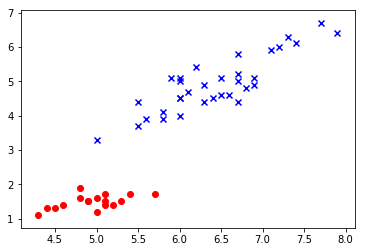

In [20]:
plt.figure()
for (x,y) in zip(X_test,y_test):
    if y==-1:
        plt.scatter(x[0],x[1], color='red', marker='o', label='setosa')
    if y==1:
        plt.scatter(x[0],x[1], color='blue', marker='x', label='versicolor')
plt.show()

In [21]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot class samples
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker=markers[idx], label=cl)

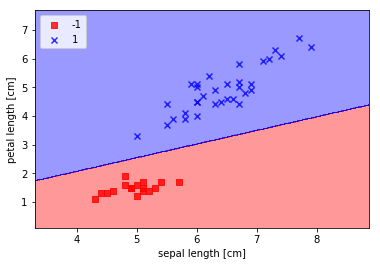

In [22]:
plot_decision_regions(X_test, y_test, classifier=pn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [ ]:
Although the perceptron classified the two Iris flower classes perfectly, convergence is one of the biggest problems of the perceptron.

Frank Rosenblatt proved mathematically that the perceptron learning rule converges if the two classes can be separated by a linear hyperplane.

However, if classes cannot be separated perfectly by such a linear decision boundary, the weights will never stop updating unless we set a maximum number of epochs.

From "Python Machine Learning by Sebastian Raschka, 2015".

In [23]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression, we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

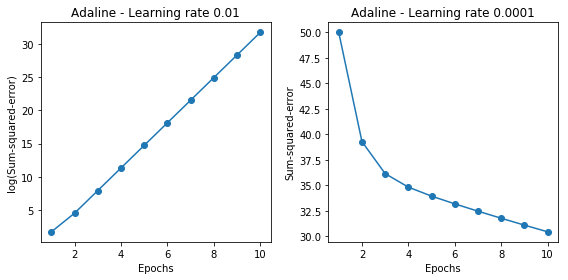

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X_train, y_train)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X_train, y_train)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.tight_layout()
# plt.savefig('./adaline_1.png', dpi=300)
plt.show()

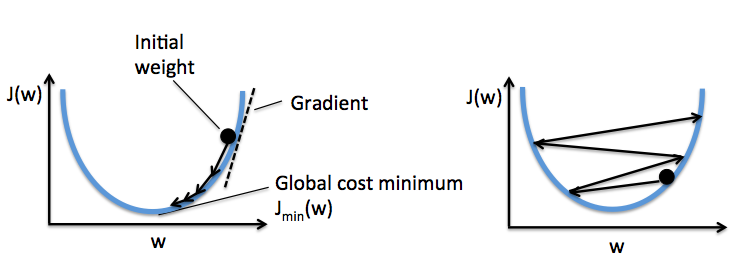

In [25]:
Image(filename='D://机器学习//万门机器学习//代码//wanmen_course (copy)//linearclassifiers（线性分类器）//images//02_12.png', width=700) 